# EDA and Data Preperocessing

This notebook provides an exploratory data analysis on the franchise webscraping dataset. The collection process is available here in [this notebook](https://drive.google.com/uc?export=download&id=1kCsjLazcZRi8Buy87EX7cjpzySgqPyi7).

# Installing Necessary Packages

In [1]:
!pip install sentence-transformers

# Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sentence_transformers import SentenceTransformer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Performing Basic EDA

In this section, we first load the dataset into a pandas.Dataframe and then perform some basic exploratory data analysis (EDA).

In [3]:
franchise_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1kCsjLazcZRi8Buy87EX7cjpzySgqPyi7', low_memory=False)
franchise_data.info()
franchise_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   franchise_href             997 non-null    object 
 1   franchise_id               997 non-null    int64  
 2   franchise_name             997 non-null    object 
 3   description                997 non-null    object 
 4   franchise_category         997 non-null    object 
 5   franchise_type             997 non-null    object 
 6   costs                      925 non-null    float64
 7   total_outlets              337 non-null    object 
 8   website_url                587 non-null    object 
 9   phone_number               842 non-null    float64
 10  email_address              449 non-null    object 
 11  year_established           711 non-null    float64
 12  company_name               547 non-null    object 
 13  company_address            291 non-null    object 

,franchise_href,franchise_id,franchise_name,description,franchise_category,franchise_type,costs,total_outlets,website_url,phone_number,email_address,year_established,company_name,company_address,net_profits_per_month,license_duration_in_years,royalty_fees_per_month,return_of_investments,logo_image_url,image_url
0,https://fleibisnis.com/franchisedetails/akilad...,1,Akila Dental,AKILA DENTAL adalah klinik gigi pilihan terbai...,Kesehatan & Kecantikan,Waralaba,9.000000e+08,3,https://akiladental.co.id/,8.191889e+10,NaN,2015.0,"Akila Dental Indonesia, PT",Emporium Pluit Mall Lt2#01 Jl. Pluit Selatan R...,27000000.0,5.0,7.0,30.0,NaN,NaN
1,https://fleibisnis.com/franchisedetails/alfama...,2,"ALFAMART, ALFAEXPRESS dan ALFAX","PT Sumber Alfaria Trijaya, Tbk merupakan salah...",Retail & Minimarket,Waralaba,5.000000e+08,16,https://alfamart.co.id/,2.115010e+08,sat_franchise_alfamart@sat.co.id,1999.0,"Sumber Alfaria Trijaya, Tbk","Alfa Tower Lantai 12, Jalan Jalur Sutera Barat...",NaN,5.0,NaN,NaN,NaN,NaN
2,https://fleibisnis.com/franchisedetails/amorca...,3,Amorcakes & Bakery,Amorcakes & Bakery adalah perusahaan yang berg...,Kuliner,Kemitraan,7.430000e+08,26,https://www.instagram.com/amorcakesandbakery/,8.118703e+09,amor.group754@gmail.com,2010.0,"Inovasi Sukses Persada, PT","Jl. Ahmad Yani RT 003/005, Sukabumi, Jawa Bara...",NaN,5.0,1.0,NaN,NaN,NaN
3,https://fleibisnis.com/franchisedetails/anakba...,4,Anak Bakmie,Anak Bakmie by Jenda McLover terinspirasi atas...,Kuliner,Waralaba,8.000000e+07,9,https://solomonutama.com/,NaN,NaN,2021.0,"Solomon Utama, PT","Jl. Kaji No.40, RT.10/RW.7, Petojo Utara, Keca...",20000000.0,5.0,NaN,20.0,NaN,NaN
4,https://fleibisnis.com/franchisedetails/apotekk24,5,Apotek K24,Apotek K24 merupakan Jaringan Apotek Waralaba ...,Kesehatan & Kecantikan,Waralaba,1.100000e+09,576,https://www.k24klik.com/,8.121201e+10,franchise@k24.co.id,2002.0,"K24 Indonesia, PT","Jl. Magelang, Karangwaru Kidul Pr 24, Yogyakar...",NaN,6.0,2.0,NaN,NaN,NaN


In [4]:
print(f"There are {len(franchise_data)} rows in the dataset.")

There are 997 rows in the dataset.


# Distribution of Categories

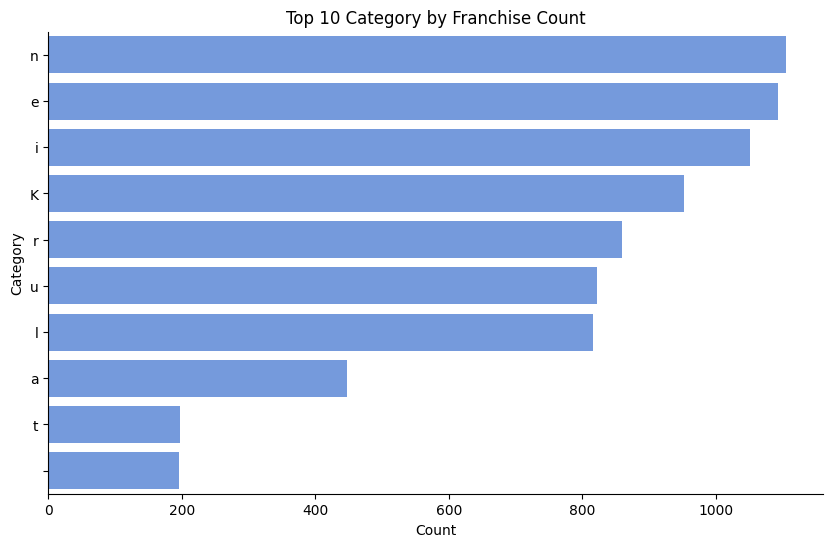

In [5]:
# Get all terms
all_category = [category for sublist in franchise_data['franchise_category'].tolist() for category in sublist]

# Count terms
category_count = Counter(all_category)

# Create dataframe
df_category = pd.DataFrame.from_dict(category_count, orient='index').reset_index()
df_category.columns = ['Category', 'Count']

# Sort by count and take the top 10
df_category_top10 = df_category.sort_values('Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Category', data=df_category_top10, color='cornflowerblue')

# Remove top and right spines
sns.despine()

plt.title('Top 10 Category by Franchise Count')
plt.show()

# Word Cloud of Franchise Names

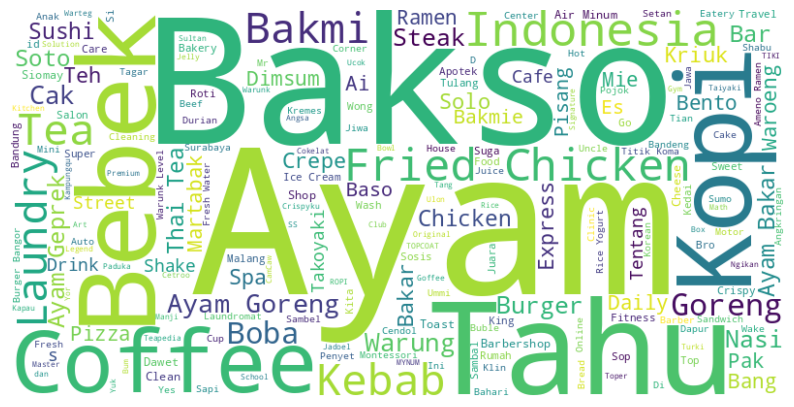

In [6]:
from wordcloud import WordCloud

# Concatenate all titles
all_names = ' '.join(franchise_data['franchise_name'].tolist())

# Create word cloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400).generate(all_names)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
# Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_names)

# Get the words and their frequencies
words_frequency = wordcloud.words_

# Convert the dictionary to a list of words
word_list = list(words_frequency.keys())

# Print the list of words
print(word_list)

['Ayam', 'Bakso', 'Tahu', 'Bebek', 'Kopi', 'Coffee', 'Indonesia', 'Fried Chicken', 'Kebab', 'Tea', 'Laundry', 'Bakmi', 'Goreng', 'Boba', 'Ayam Goreng', 'Warung', 'Cak', 'Burger', 'Nasi', 'Steak', 'Bar', 'Soto', 'Ayam Geprek', 'Chicken', 'Sushi', 'Thai Tea', 'Ayam Bakar', 'Crepe', 'Express', 'Kriuk', 'Bakar', 'Solo', 'Teh', 'Spa', 'Pak', 'Daily', 'Dimsum', 'Pizza', 'Martabak', 'Mie', 'Bang', 'Bento', 'Waroeng', 'Ramen', 'Ai', 'Bakmie', 'Es', 'Pisang', 'Baso', 'Cafe', 'Shake', 's', 'Drink', 'Takoyaki', 'Street', 'Tentang', 'Barbershop', 'Toast', 'Clean', 'Siomay', 'Shop', 'Cheese', 'Dawet', 'Air Minum', 'Bakery', 'Apotek', 'Juara', 'Crispy', 'Fitness', 'Go', 'King', 'Top', 'Salon', 'id', 'Roti', 'Rumah', 'Wash', 'Bro', 'Kedai', 'Sambal', 'Wong', 'Sop', 'Travel', 'Care', 'Suga', 'Si', 'Sosis', 'Kita', 'Sweet', 'Super', 'Food', 'Bandung', 'Tulang', 'Malang', 'Ice Cream', 'Anak', 'Di', 'Fresh', 'Sandwich', 'Clinic', 'Ini', 'Corner', 'Auto', 'Jiwa', 'Beef', 'Center', 'Online', 'Montessori', 

# Approaches

We will be testing two approaches to recommend papers to a user.

- The first approach is a content-based approach, where we will be recommending franchises based on the similarity of their names.
- The second approach is also a content-based approach but we will be recommending franchises based on the similarity of their description.

# Content-based approach using franchise names

Let's us start by exploring the first approach.

Since we are using the names of the franchises to recommend similar franchises, we can drop the other columns.

In [7]:
names_dataset = franchise_data.drop(columns = ["description"])

In [8]:
names_dataset.head()

,franchise_href,franchise_id,franchise_name,franchise_category,franchise_type,costs,total_outlets,website_url,phone_number,email_address,year_established,company_name,company_address,net_profits_per_month,license_duration_in_years,royalty_fees_per_month,return_of_investments,logo_image_url,image_url
0,https://fleibisnis.com/franchisedetails/akilad...,1,Akila Dental,Kesehatan & Kecantikan,Waralaba,9.000000e+08,3,https://akiladental.co.id/,8.191889e+10,NaN,2015.0,"Akila Dental Indonesia, PT",Emporium Pluit Mall Lt2#01 Jl. Pluit Selatan R...,27000000.0,5.0,7.0,30.0,NaN,NaN
1,https://fleibisnis.com/franchisedetails/alfama...,2,"ALFAMART, ALFAEXPRESS dan ALFAX",Retail & Minimarket,Waralaba,5.000000e+08,16,https://alfamart.co.id/,2.115010e+08,sat_franchise_alfamart@sat.co.id,1999.0,"Sumber Alfaria Trijaya, Tbk","Alfa Tower Lantai 12, Jalan Jalur Sutera Barat...",NaN,5.0,NaN,NaN,NaN,NaN
2,https://fleibisnis.com/franchisedetails/amorca...,3,Amorcakes & Bakery,Kuliner,Kemitraan,7.430000e+08,26,https://www.instagram.com/amorcakesandbakery/,8.118703e+09,amor.group754@gmail.com,2010.0,"Inovasi Sukses Persada, PT","Jl. Ahmad Yani RT 003/005, Sukabumi, Jawa Bara...",NaN,5.0,1.0,NaN,NaN,NaN
3,https://fleibisnis.com/franchisedetails/anakba...,4,Anak Bakmie,Kuliner,Waralaba,8.000000e+07,9,https://solomonutama.com/,NaN,NaN,2021.0,"Solomon Utama, PT","Jl. Kaji No.40, RT.10/RW.7, Petojo Utara, Keca...",20000000.0,5.0,NaN,20.0,NaN,NaN
4,https://fleibisnis.com/franchisedetails/apotekk24,5,Apotek K24,Kesehatan & Kecantikan,Waralaba,1.100000e+09,576,https://www.k24klik.com/,8.121201e+10,franchise@k24.co.id,2002.0,"K24 Indonesia, PT","Jl. Magelang, Karangwaru Kidul Pr 24, Yogyakar...",NaN,6.0,2.0,NaN,NaN,NaN


In [9]:
average_name_length = int(names_dataset['franchise_name'].apply(len).mean())
print(f"The average text length of a title is {average_name_length} characters.")

The average text length of a title is 15 characters.


In [10]:
# Calculate the length of each title
names_dataset['names_length'] = names_dataset['franchise_name'].apply(len)

# Calculate the min and max length
min_length = names_dataset['names_length'].min()
max_length = names_dataset['names_length'].max()

print('The minimum length of a franchise name:', min_length)
print('The maximum length of a franchise name:', max_length)

The minimum length of a franchise name: 3
The maximum length of a franchise name: 45


In [11]:
def plot_length_distribution(df, column_name) -> None:
    """
    Plots a histogram representing the distribution of lengths in a specified column of a DataFrame.
    The histogram also displays the mean length and one standard deviation above and below the mean.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column in the DataFrame for which to plot the length distribution.

    Returns:
        None. This function outputs a plot.
    """

    # Compute the lengths of all titles
    names_lengths = df[column_name].apply(len)

    # Calculate mean and standard deviation
    mean_length = names_lengths.mean()
    std_length = names_lengths.std()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(names_lengths, bins=50, color='b', alpha=0.2)

    # Add lines for the mean and standard deviation
    plt.axvline(mean_length, color='r', linestyle='-', linewidth=1.5)
    plt.axvline(mean_length - std_length, color='gray',
                linestyle='--', linewidth=1)
    plt.axvline(mean_length + std_length, color='gray',
                linestyle='--', linewidth=1)

    # Add a text box with the mean value
    plt.text(mean_length+5, plt.gca().get_ylim()
             [1]*0.9, f"Mean: {mean_length:.2f}", fontsize=10)

    plt.title('Distribution of ' + column_name.capitalize() + ' Lengths')
    plt.xlabel(column_name.capitalize() + ' Length')
    plt.ylabel('Frequency')
    plt.legend(['Mean', 'Standard Deviation'])
    plt.show()

In [12]:
def plot_top_words(df, column_name) -> None:
    """
    Plot the top 10 most common words in a specified column of a DataFrame.

    The function tokenizes the strings, converts to lower case, removes non-alphabetic tokens
    and stop words, counts the frequency of each word, and then plots the 10 most common words
    using a horizontal bar plot.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The column of the DataFrame to analyze.

    Returns:
        None. The function shows a plot.
    """

    # Create a single string containing all sentences
    all_setences= " ".join(df[column_name].values)

    # Tokenize the string
    tokens = word_tokenize(all_setences)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove non-alphabetic tokens and stop words
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Count the frequency of each word
    counter = Counter(words)

    # Get the 10 most common words
    most_common = counter.most_common(10)

    # Create a DataFrame from the most common words
    most_common_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

    # Plot the results using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(y='Word', x='Frequency', data=most_common_df, palette='viridis', orient='h')

    # Change font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.title(f'Top 10 Words in {column_name} column', fontsize=16)
    plt.show()

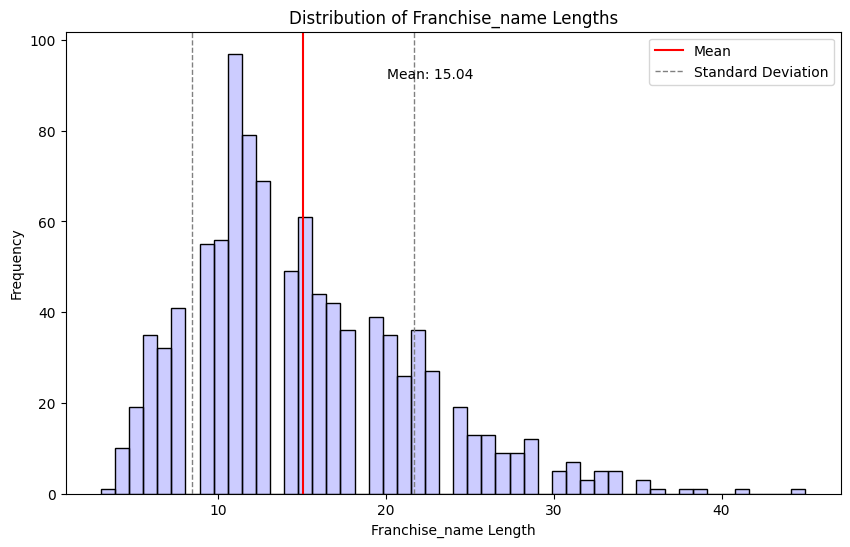

In [13]:
plot_length_distribution(names_dataset, 'franchise_name')

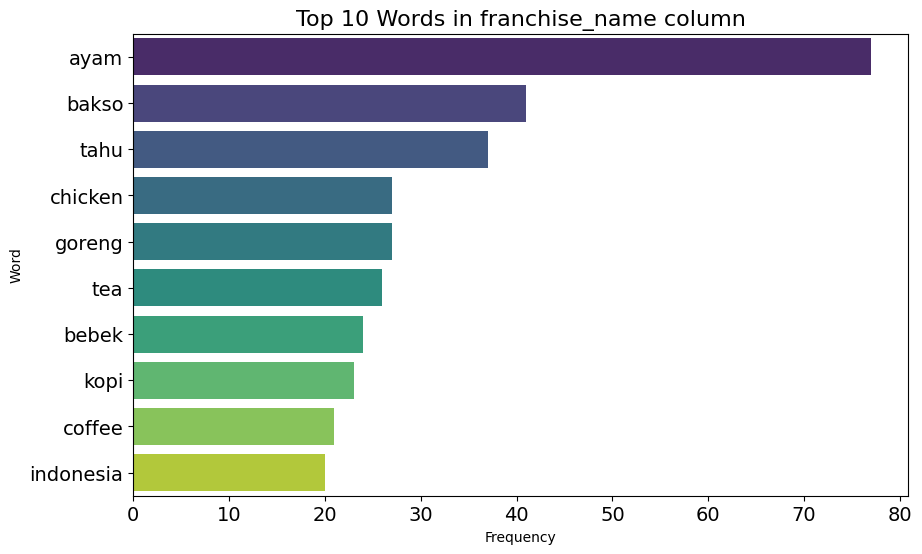

In [14]:
plot_top_words(names_dataset, 'franchise_name')

# Content-based approach using descriptions

Let's us now explore the second approach.

We will be dropping the franchise_name column and keeping the description column.

In [15]:
description_dataset = franchise_data.drop(columns = ["franchise_name"])
description_dataset.head()

,franchise_href,franchise_id,description,franchise_category,franchise_type,costs,total_outlets,website_url,phone_number,email_address,year_established,company_name,company_address,net_profits_per_month,license_duration_in_years,royalty_fees_per_month,return_of_investments,logo_image_url,image_url
0,https://fleibisnis.com/franchisedetails/akilad...,1,AKILA DENTAL adalah klinik gigi pilihan terbai...,Kesehatan & Kecantikan,Waralaba,9.000000e+08,3,https://akiladental.co.id/,8.191889e+10,NaN,2015.0,"Akila Dental Indonesia, PT",Emporium Pluit Mall Lt2#01 Jl. Pluit Selatan R...,27000000.0,5.0,7.0,30.0,NaN,NaN
1,https://fleibisnis.com/franchisedetails/alfama...,2,"PT Sumber Alfaria Trijaya, Tbk merupakan salah...",Retail & Minimarket,Waralaba,5.000000e+08,16,https://alfamart.co.id/,2.115010e+08,sat_franchise_alfamart@sat.co.id,1999.0,"Sumber Alfaria Trijaya, Tbk","Alfa Tower Lantai 12, Jalan Jalur Sutera Barat...",NaN,5.0,NaN,NaN,NaN,NaN
2,https://fleibisnis.com/franchisedetails/amorca...,3,Amorcakes & Bakery adalah perusahaan yang berg...,Kuliner,Kemitraan,7.430000e+08,26,https://www.instagram.com/amorcakesandbakery/,8.118703e+09,amor.group754@gmail.com,2010.0,"Inovasi Sukses Persada, PT","Jl. Ahmad Yani RT 003/005, Sukabumi, Jawa Bara...",NaN,5.0,1.0,NaN,NaN,NaN
3,https://fleibisnis.com/franchisedetails/anakba...,4,Anak Bakmie by Jenda McLover terinspirasi atas...,Kuliner,Waralaba,8.000000e+07,9,https://solomonutama.com/,NaN,NaN,2021.0,"Solomon Utama, PT","Jl. Kaji No.40, RT.10/RW.7, Petojo Utara, Keca...",20000000.0,5.0,NaN,20.0,NaN,NaN
4,https://fleibisnis.com/franchisedetails/apotekk24,5,Apotek K24 merupakan Jaringan Apotek Waralaba ...,Kesehatan & Kecantikan,Waralaba,1.100000e+09,576,https://www.k24klik.com/,8.121201e+10,franchise@k24.co.id,2002.0,"K24 Indonesia, PT","Jl. Magelang, Karangwaru Kidul Pr 24, Yogyakar...",NaN,6.0,2.0,NaN,NaN,NaN


In [16]:
average_description_length = int(description_dataset['description'].apply(len).mean())
print(f"The average text length of an description is {average_description_length} characters.")

The average text length of an description is 166 characters.


In [17]:
# Calculate the length of each description
description_dataset['description_length'] = description_dataset['description'].apply(len)

In [18]:
# Calculate the min and max length
min_length = description_dataset['description_length'].min()
max_length = description_dataset['description_length'].max()

print('The minimum length of an description:', min_length)
print('The maximum length of an description:', max_length)

The minimum length of an description: 26
The maximum length of an description: 1341


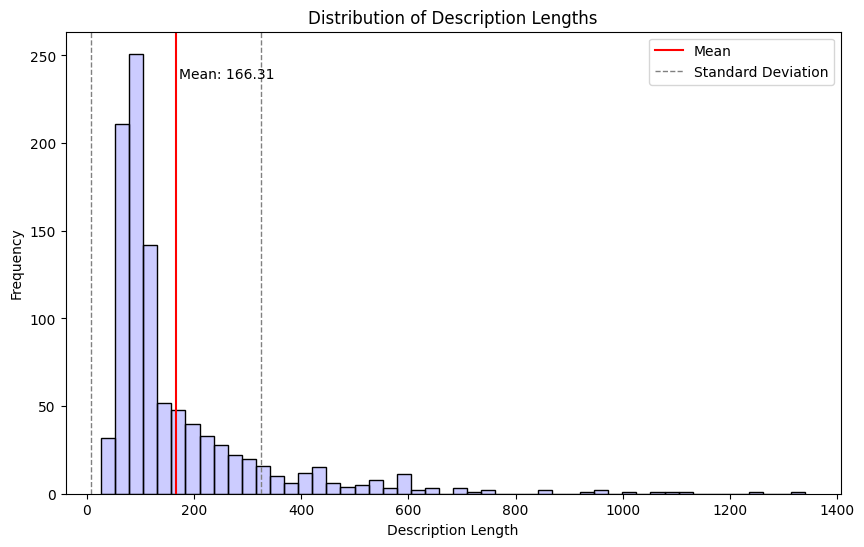

In [19]:
plot_length_distribution(description_dataset, 'description')

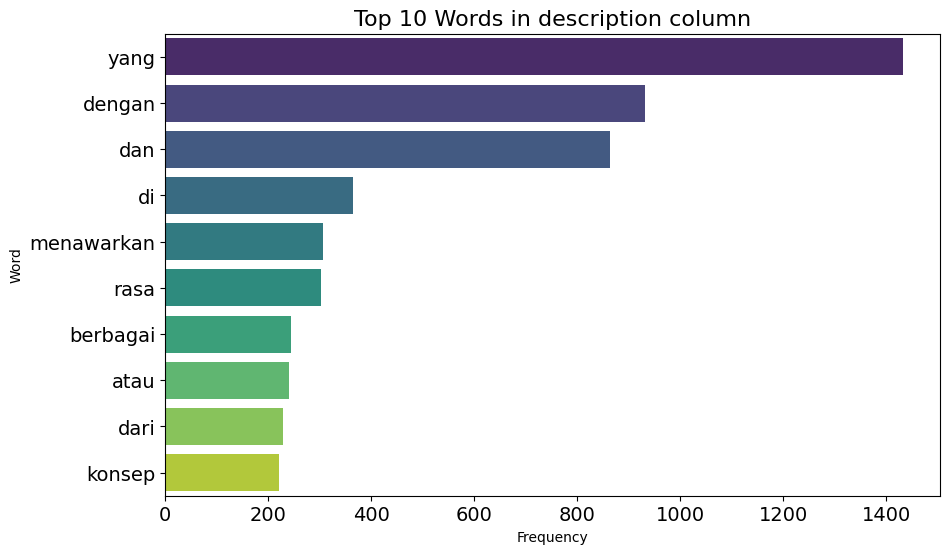

In [20]:
plot_top_words(description_dataset, 'description')

# Sentence Embeddings

This notebook contains the code to generate sentence embeddings using the pre-trained models from the [sentence-transformers](https://www.sbert.net/index.html) library.

In [21]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our feature we like to encode
sentences = franchise_data['franchise_name']

# Features are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [22]:
# Print the embeddings
c = 0
for sentence, embedding in zip(sentences, embeddings):

    print("Sentence:", sentence)
    print("Embedding dimension:", len(embedding))
    print("Franchise Name length:", len(sentence))
    print("")

    if c >=5:
        break
    c +=1

Sentence: Akila Dental
Embedding dimension: 384
Franchise Name length: 12

Sentence: ALFAMART, ALFAEXPRESS dan ALFAX
Embedding dimension: 384
Franchise Name length: 31

Sentence: Amorcakes & Bakery
Embedding dimension: 384
Franchise Name length: 18

Sentence: Anak Bakmie
Embedding dimension: 384
Franchise Name length: 11

Sentence: Apotek K24
Embedding dimension: 384
Franchise Name length: 10

Sentence: ASTONS
Embedding dimension: 384
Franchise Name length: 6



In [23]:
import pickle

#menyimpan embeddings ke file
with open('embedding.pkl', 'wb') as file:
  pickle.dump(embeddings, file)

with open('sentences.pkl', 'wb') as file:
  pickle.dump(sentences, file)

# Testing the embedding model

In [24]:
franchise_you_like = input("Enter your business of interest here 👇 \n")
franchise_you_like

Enter your business of interest here 👇 
Ayam Goreng


'Ayam Goreng'

In [32]:
from sentence_transformers import util
cosine_scores = util.cos_sim(embeddings, model.encode(franchise_you_like))

In [33]:
import torch
top_similar_franchise = torch.topk(cosine_scores,dim=0, k=5,sorted=True)
top_similar_franchise

torch.return_types.topk(
values=tensor([[0.8446],
        [0.8230],
        [0.7585],
        [0.7440],
        [0.7386]]),
indices=tensor([[714],
        [607],
        [624],
        [748],
        [678]]))

In [34]:
for i in top_similar_franchise.indices:
#     print(i)
    print(sentences[i.item()])

Ayam Goreng Mojopahit
Ali Ayam Goreng
Ayam Goreng Fatmawati
Ayam Goreng Bikin Tajir
Ayam Selebriti
